In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


In [2]:
start = '2012-01-01'
end = '2023-12-21'
stock = 'GOOG'
data = yf.download( stock,  start , end)


[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)


In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
3007,2023-12-14,134.770004,135.035004,131.059998,133.199997,133.199997,29619100
3008,2023-12-15,132.919998,134.830002,132.630005,133.839996,133.839996,58569400
3009,2023-12-18,133.860001,138.380005,133.770004,137.190002,137.190002,25699800
3010,2023-12-19,138.000000,138.770004,137.449997,138.100006,138.100006,20661000


In [5]:
ma_100_days = data.Close.rolling(100).mean()

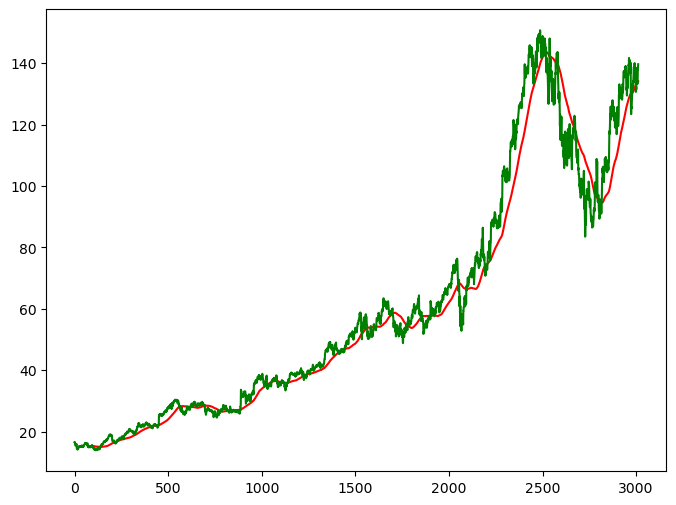

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,"r")
plt.plot(data.Close,'g')
plt.show()

In [7]:
data.dropna(inplace=True)

In [8]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [9]:
data_train.shape[0]

2409

In [10]:
data_test.shape[0]

603

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [12]:
data_train_scale = scaler.fit_transform(data_train)

In [13]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [34]:
x, y = np.array(x), np.array(y)

In [35]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [38]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
                       input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [39]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [40]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - loss: 1824.6715
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step - loss: 1684.5591
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 187ms/step - loss: 276079.4375
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - loss: 3065.5425
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step - loss: 1748.4718
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 174ms/step - loss: 1798.6085
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step - loss: 1770.4178
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 176ms/step - loss: 1784.3204
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - loss: 1773.3754
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 181ms/step - loss: 1780.1992
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - loss: 1886.3776
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 186ms/step - loss: 1715.7683
Epoch 13/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step - loss: 1757.6582
Epoch 14/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 174ms/step - loss: 1690.2855
Epoch 15/50
1

In [42]:
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [43]:
pas_100_days = data_train.tail(100)

In [44]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [45]:
data_test_scale  =  scaler.fit_transform(data_test)

In [46]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [47]:
y_predict = model.predict(x)

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step


In [48]:
scale =1/scaler.scale_

In [49]:
y_predict = y_predict*scale

In [50]:
y = y*scale

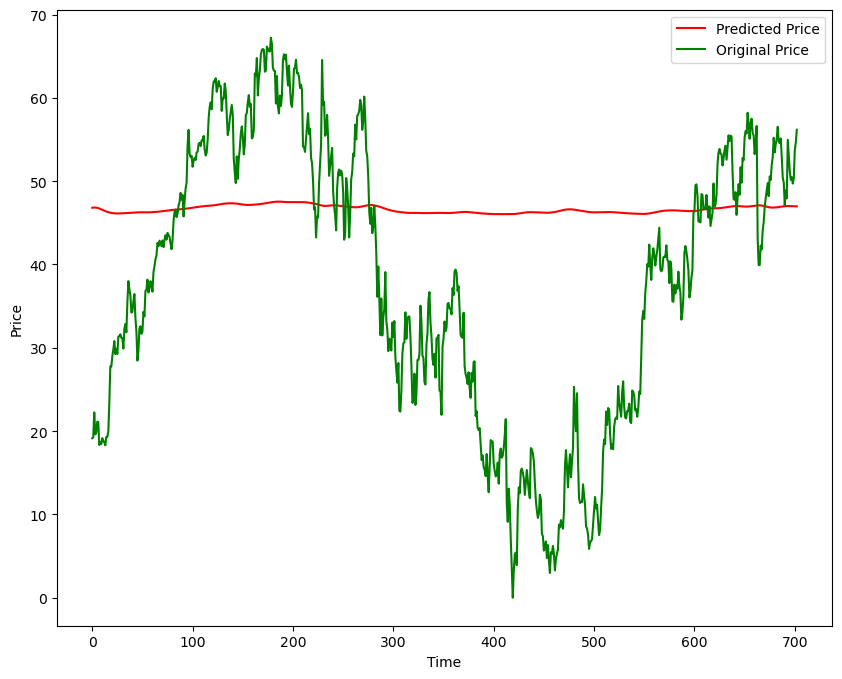

In [51]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [54]:
model.save('Stock Predictions Model.keras')